In [7]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df['custcat'].value_counts()


custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

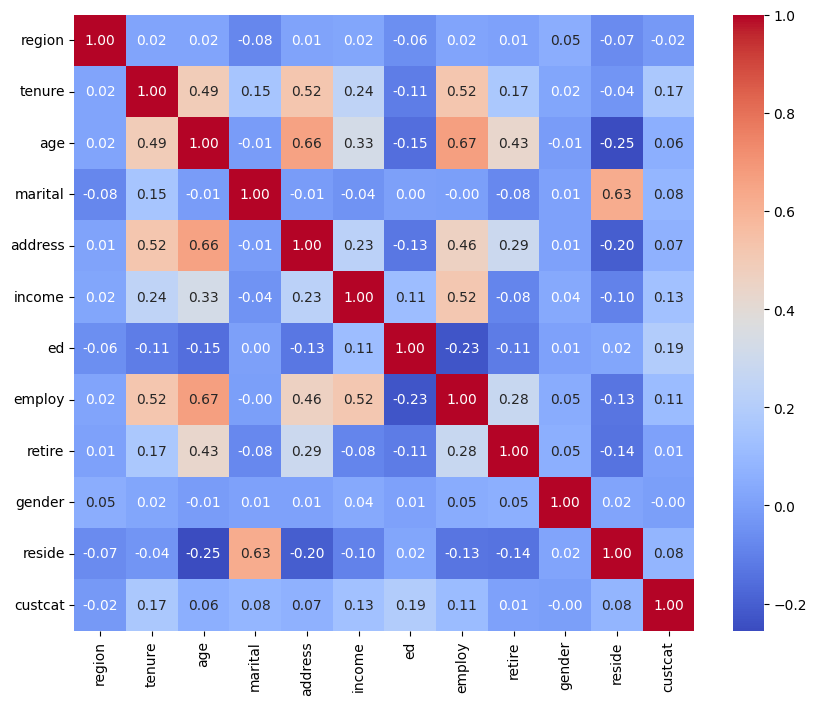

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

In [11]:
corr_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
corr_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [13]:
x = df.drop('custcat', axis=1)
y = df['custcat']
x_norm = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

KNN :

In [15]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn_model = knn.fit(x_train, y_train)

In [17]:
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.365

In [19]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = knn_model_n.predict(x_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [20]:
acc

array([0.29 , 0.34 , 0.365, 0.325, 0.33 , 0.33 , 0.33 , 0.335, 0.33 ,
       0.35 ])

In [21]:
std_acc

array([0.03208582, 0.03349627, 0.03404225, 0.0331191 , 0.03324906,
       0.03324906, 0.03324906, 0.03337477, 0.03324906, 0.03372684])

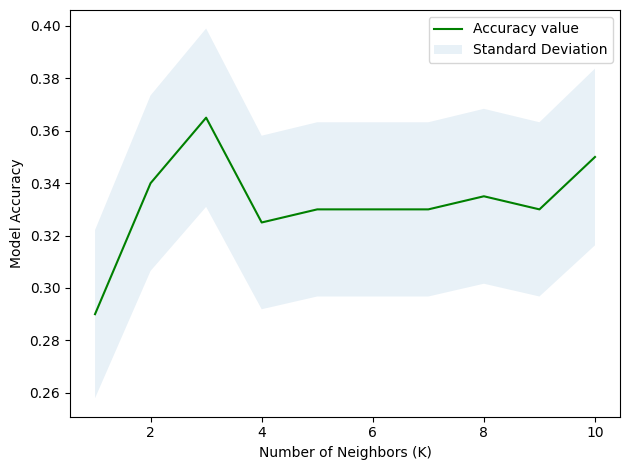

In [22]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()